In [2]:
conda install -c astropy astroml

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Camila\Anaconda3\envs\pdi

  added / updated specs:
    - astroml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astroml-0.4.post1          |             py_0          87 KB  astropy
    astropy-3.2.1              |   py36hfa6e2cd_0         6.8 MB  astropy
    atomicwrites-1.3.0         |           py36_1          13 KB
    certifi-2019.6.16          |           py36_1         156 KB
    importlib_metadata-0.17    |           py36_1          40 KB
    more-itertools-7.2.0       |           py36_0         100 KB
    packaging-19.0             |           py36_0          38 KB
    pluggy-0.12.0              |             py_0          20 KB
    psutil-5.6.3               |   py36he774522_0         351 KB
    py-1.8.0                   |           py36_0         140 KB
    pytest-5.0.1          



==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda




In [24]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_galaxy_colors

In [15]:
data = fetch_sdss_galaxy_colors()
type(data)

numpy.ndarray

In [16]:
dataframe = pd.DataFrame.from_records(data)
type(dataframe)

pandas.core.frame.DataFrame

In [22]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
u               50000 non-null float64
g               50000 non-null float64
r               50000 non-null float64
i               50000 non-null float64
z               50000 non-null float64
specClass       50000 non-null object
redshift        50000 non-null float64
redshift_err    50000 non-null float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [21]:
dataframe['specClass'].value_counts()

GALAXY    41774
QSO        8226
Name: specClass, dtype: int64

In [3]:

data = data[::10]  # truncate for plotting

# Extract colors and spectral class
ug = data['u'] - data['g']
gr = data['g'] - data['r']
spec_class = data['specClass']

galaxies = (spec_class == 'GALAXY')
qsos = (spec_class == 'QSO')

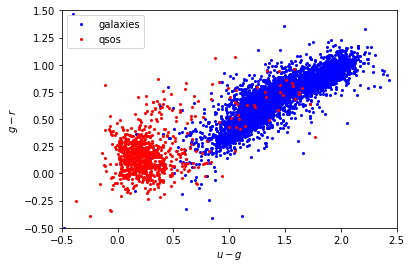

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 1.5)

ax.plot(ug[galaxies], gr[galaxies], '.', ms=4, c='b', label='galaxies')
ax.plot(ug[qsos], gr[qsos], '.', ms=4, c='r', label='qsos')

ax.legend(loc=2)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

plt.show()

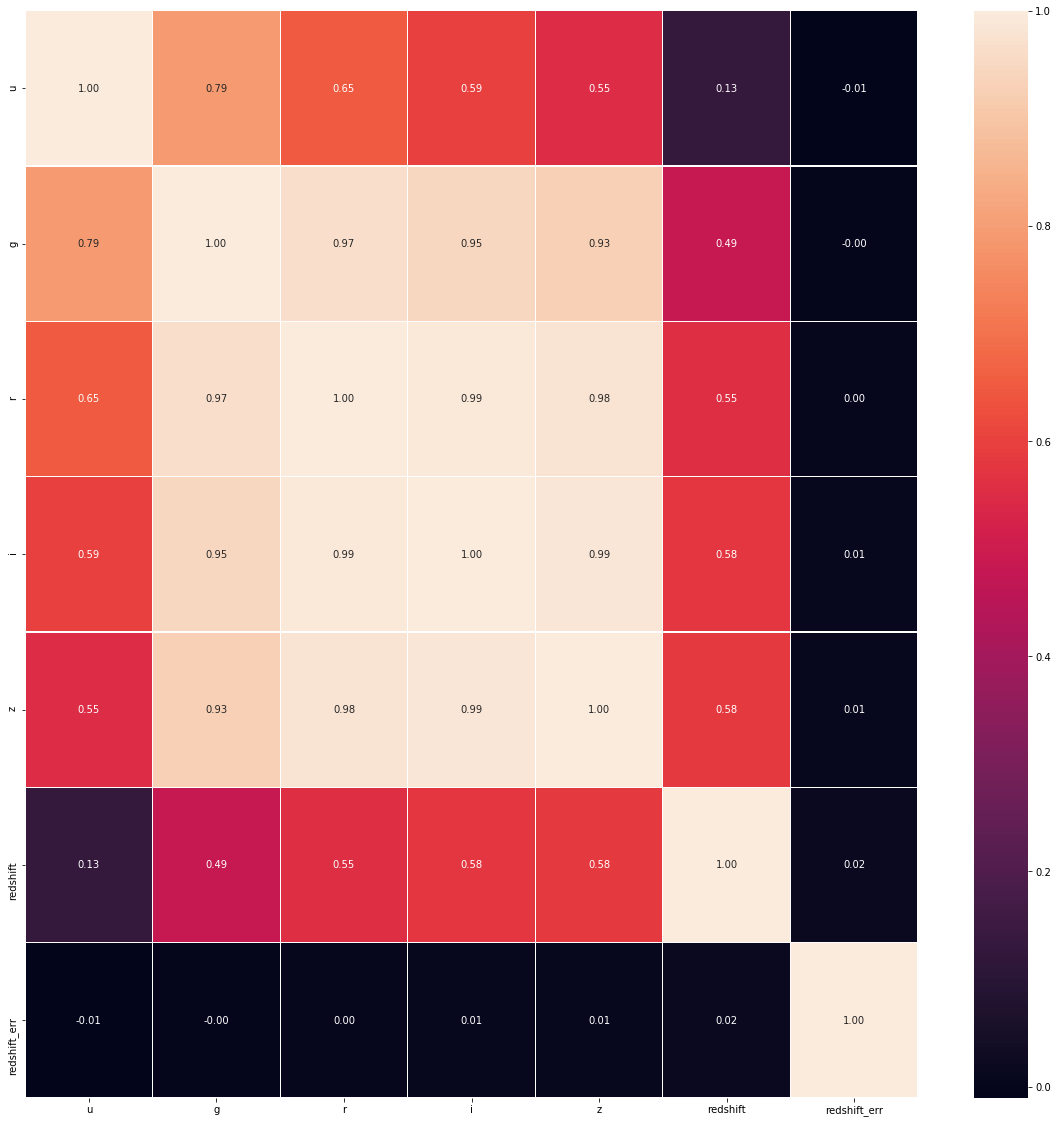

In [25]:
f,ax = plt.subplots(figsize = (20, 20))
sns.heatmap(dataframe.corr(), annot = True, linewidths = .2, fmt = '.2f')
plt.show()